2.2 read in the data below and answer questions.

In [6]:
import statistics as stats
l = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
len(l)

27

a) What is the mean and median of the data?

In [8]:
#first, manual calc:
mean_l = sum(l)/len(l)
print(mean_l)
#now programmatically
print(stats.mean(l))

29.962962962962962
29.962962962962962


In [10]:
# manual
median_l = l[int(len(l)/2)]
print(median_l)
#programmatically
print(stats.median(l))

25
25


b) What is the mode of the data?  Comment on the data's modality.

In [22]:
# bimodal requires manual construction
def mode(valueList):
  frequencies = {}
  for value in valueList:
    if value in frequencies:
      frequencies[value] += 1
    else:
      frequencies[value] = 1
  max_value = max(frequencies.values())
  mode = [i for i,v in frequencies.items() if v==max_value]
  return mode

print(mode(l))

# only works for unimodal
#stats.mode(l) gives an error

[35, 25]


c) What is the midrange?

In [136]:
midrange = (max(l) + min(l))/2
print(midrange)

41.5


d) Calculate $Q_1$ and $Q_3$.

In [48]:
# Quartiles: manual
import math
def quantile(data, k, q):
    # find counts below each value
    sorted_data = sorted(data)
    q_k = math.floor(k/q*len(sorted_data))
    return sorted_data[q_k]
print(quantile(l, 1, 4)) # Q_1
print(quantile(l, 3, 4)) # Q_3

# automagic: For this we will use pandas\
import pandas as pd
df = pd.DataFrame(l)
quantiles = df.quantile([0.25,0.75])
print(quantiles[[0]])

20
35
         0
0.25  20.5
0.75  35.0


e) Give the 5-number summary of the data:

In [138]:
# Manual
def five_number_summary(data):
    sorted_data = sorted(data)
    return [
        min(sorted_data),
        quantile(sorted_data, 1, 4),
        sorted_data[int(len(sorted_data)/2)], # left calculated median
        quantile(sorted_data, 3, 4),
        max(sorted_data)
    ]

print(five_number_summary(l))

[13, 20, 25, 35, 70]


f) Show the boxplot of the data.

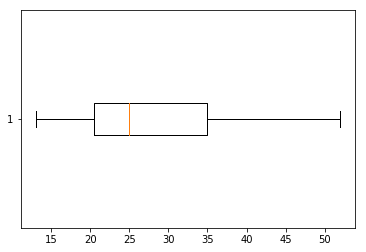

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(l, 0, '', 0) # print horizontal, including outliers
plt.show()

g) how is a quantile-quantile plot different from a quantile plot?

A quantile plot (or percentile plot) displays the data in order with the percentile values along with the plot data.

A quantile-quantile plot plots the data quantiles on one axis and the quantiles of another dataset on the other axis so that they can be compared to a straight line.  The closer the QQ plot is to the line x=y, the closer the two data sets are to each other in distribution.

2.3)  Given the data below, calculate an approximate median.

In [78]:
data= [[1,5,200],[6,15,450],[16,20,300],[21,50,1500],[51,80,700],[81,110,44]]
df = pd.DataFrame(data, columns=['minage','maxage','frequency'])
df

,minage,maxage,frequency
0,1,5,200
1,6,15,450
2,16,20,300
3,21,50,1500
4,51,80,700
5,81,110,44


In [92]:
# accumulate the sum of frequencies to each row
c1 =  df['frequency'].cumsum(axis=0) 
c1

0     200
1     650
2     950
3    2450
4    3150
5    3194
Name: frequency, dtype: int64

In [93]:
# these are including the row so they need to be pushed down. First row should have a zero
c2 = pd.Series([0])
c3 = c2.append(c1, ignore_index=True)
c3.truncate(after=5)
c3

0       0
1     200
2     650
3     950
4    2450
5    3150
6    3194
dtype: int64

In [94]:
# That's better.  now merge this with the previous columns
df['cumulateuntil'] = c3
# and added the rest of the info we need 
df['width'] = df['maxage']-df['minage']
df['cumulative'] = c1
df

,minage,maxage,frequency,cumulateuntil,width,cumulative
0,1,5,200,0,4,200
1,6,15,450,200,9,650
2,16,20,300,650,4,950
3,21,50,1500,950,29,2450
4,51,80,700,2450,29,3150
5,81,110,44,3150,29,3194


In [83]:
# the median group is found the usual way
medianbyfreq=df['frequency'].sum()/2
medianbyfreq
x = df[df['cumulative'] > medianbyfreq].iloc[0]
x

minage             21
maxage             50
frequency        1500
cumulateuntil     950
width              29
cumulative       2450
Name: 3, dtype: int64

In [91]:
# that puts us in group three.
# The formula for estimating the median is:
def median_from_freq(dataframe):
    medianbyfreq=df['frequency'].sum()/2
    x = df[df['cumulative'] > medianbyfreq].iloc[0] # this is the data we need.
    L_1 = x['minage']
    N = df['frequency'].sum()
    S_freq_l = x['cumulateuntil']
    freq_median = x['frequency']
    return L_1 + (N/2 - S_freq_l)/freq_median*x['width']

median_from_freq(df)

33.50866666666667

2.6) Given the two rows below, find the distances specified.

In [98]:
r_1 = [22,1,42,10]
r_2 = [20,0,36,8]

a) Find the Euclidean distance:
    $$\sqrt{\sum_{i=0}^{n-1}(r_{1i}-r_{2i})^2}$$

In [99]:
import math
def euclidean_distance(v_1, v_2):
    c = 0
    for i in range(len(v_1)):
        c += (v_1[i] - v_2[i])**2
    return math.sqrt(c)
euclidean_distance(r_1,r_2)

6.708203932499369

b) Find the Manhattan distance:
$$\sum_{i=0}^{n-1}|r_{1i}-r_{2i}|$$

In [101]:
def manhattan_distance(v_1,v_2):
    c = 0
    for i in range(len(v_1)):
        c += abs(v_1[i] - v_2[i])
    return c

manhattan_distance(r_1, r_2)

11

c) Find the Minkowski Distance with p = 3:

$$ \sqrt[\leftroot{2}\uproot{6}\scriptstyle p]{\sum_{i=0}^{n-1}(r_{1i}-r_{2i})^p}
  \ \ \ =\ \ \  \Bigl(\sum_{i=0}^{n-1}(r_{1i}-r_{2i})^p\Bigr)^{\frac{1}{p}}, \textit{ Where } p = 3.$$

In [102]:
def minkowski_distance(v_1, v_2, p):
    c = 0
    for i in range(len(v_1)):
        c += (v_1[i] - v_2[i])**p
    return c ** (1/p)
minkowski_distance(r_1,r_2, 3)

6.153449493663682

In [103]:
# Note that Minkowski distance is a generalization of euclidean and manhattan distances:
print(minkowski_distance(r_1, r_2, 1)) # manhattan
print(minkowski_distance(r_1, r_2, 2)) # euclidean

11.0
6.708203932499369


e) Calculate the supremum distance:
$$ \lim_{h\rightarrow\infty}\Bigl(\sum_{i=0}^{n-1}(r_{1i}-r_{2i})^p\Bigr)^{\frac{1}{p}} \ \ \ =\ \ \ \max_f^p|x_{1f}-x_{2f}|$$

In [106]:
def supremum_distance(v_1, v_2):
    c = 0
    for i in range(len(v_1)):
        if abs(v_1[i] - v_2[i]) > c:
            c = abs(v_1[i] - v_2[i])
    return c
supremum_distance(r_1, r_2)

6

3.7) Use the data from 2.2 above for the following.

a) Use min-max normalization to transform 35 into a range 0-1 based on the dataset.

$$ v_i' = \frac{v_i-\min_A}{\max_A - \min_A}$$

In [108]:
print((35-min(l))/(max(l)-min(l)))

0.38596491228070173


b) Find the z-score normalization of 35 given the dataset $l$ and a standard deviation $\sigma = 12.94$.

$$ v_i' = \frac{v_i-\bar{A}}{\sigma_A}$$

In [112]:
def normalize(data, value):
    return (value-stats.mean(data))/12.94
normalize(l, 35)

0.38926097658709724

c) normalize 35 using decimal scaling over l.

$$ v_i' = \frac{v_i}{10^j}, \textit{ where j is the minimum integer such that } \max(|v_i'|) < 1$$

In [113]:
# in our case, j = 2.
print(35/10**2)

0.35


d) which, in your opinion, is best?  Why?

In my opinion, z-score normalization is almost always best because it normalizes with respect to sampling measures that help reveal clusters and outliers in the data.  Also makes it possible to compare with other columns of data in the data set with less confusion and distortion.

3.9) given the data set below, answer questions a and b.

In [114]:
t = [5,10,11,13,15,35,50,55,72,92,204,215]

a) bin the data set by equal frequency binning.

In [123]:
def equal_freq_bins(data, bins):
    size = int(len(data)/bins)
    new_list = [data[i:i+size] for i in range(0, len(data), size)]
    return new_list

print(equal_freq_bins(t, 3))

[[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]


b) equal width partitions:

In [135]:
def equal_width_bins(data, bins):
    # assumes data is sorted
    dist = max(data) - min(data)
    size = math.ceil(dist/bins)
    new_list = []
    last_i = 0
    for j in range(bins):
        bin_list = []
        k = last_i
        for i in range(k, len(data)):
            last_i = i
            if data[i] < (j+1)*size + min(data)+1:
                bin_list.append(data[i])
            else: break
        new_list.append(bin_list)
    return new_list

equal_width_bins(t, 3)

[[5, 10, 11, 13, 15, 35, 50, 55, 72], [92], [204, 215]]